In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 768
Number of columns: 9


In [11]:
print('Features:')
print(df.columns.tolist())

Features:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [13]:
print('Df types:')
print(df.dtypes)

Df types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [15]:
# Check for missing values


In [17]:
print('Missing values:')
print(df.isnull().sum())

Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [19]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

In [21]:
missing_values = df[columns_with_zeros].isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [25]:
imputer = SimpleImputer(strategy='mean')
df[columns_with_zeros] = imputer.fit_transform(df[columns_with_zeros])

In [27]:
print("\nDataFrame after imputation:")
print(df.head())


DataFrame after imputation:
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [29]:
def detect_outliers(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    return outliers

In [31]:
outliers = detect_outliers(df, columns_with_zeros)
print("\nOutliers:")
print(outliers)


Outliers:
{'Glucose': 0, 'BloodPressure': 14, 'SkinThickness': 87, 'Insulin': 164, 'BMI': 8}


In [33]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [35]:
df = remove_outliers(df, columns_with_zeros)

In [37]:
print("\nDataFrame after removing outliers:")
print(df.head())


DataFrame after removing outliers:
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [39]:
# Check if there are any categorical columns to encode
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical columns to encode:", categorical_columns)


Categorical columns to encode: Index([], dtype='object')


In [41]:
if len(categorical_columns) > 0:
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])

In [43]:
scaler = StandardScaler()
df[columns_with_zeros] = scaler.fit_transform(df[columns_with_zeros])

In [45]:
print("\nCleaned and Preprocessed DataFrame:")
print(df.head())


Cleaned and Preprocessed DataFrame:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0            6  0.927469      -0.054956       1.148892  0.303739  0.306068   
1            1 -1.293413      -0.620161       0.039375  0.303739 -0.876993   
2            8  2.161292      -0.808563       0.067745  0.303739 -1.434722   
3            1 -1.152405      -0.620161      -1.070142 -3.143400 -0.623480   
4            0  0.539696      -3.069385       1.148892  1.001127  1.911652   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [47]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
y_pred = model.predict(X_test)

In [91]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[51 10]
 [16 22]]


In [93]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        61
           1       0.69      0.58      0.63        38

    accuracy                           0.74        99
   macro avg       0.72      0.71      0.71        99
weighted avg       0.73      0.74      0.73        99



In [95]:
#section 3

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns


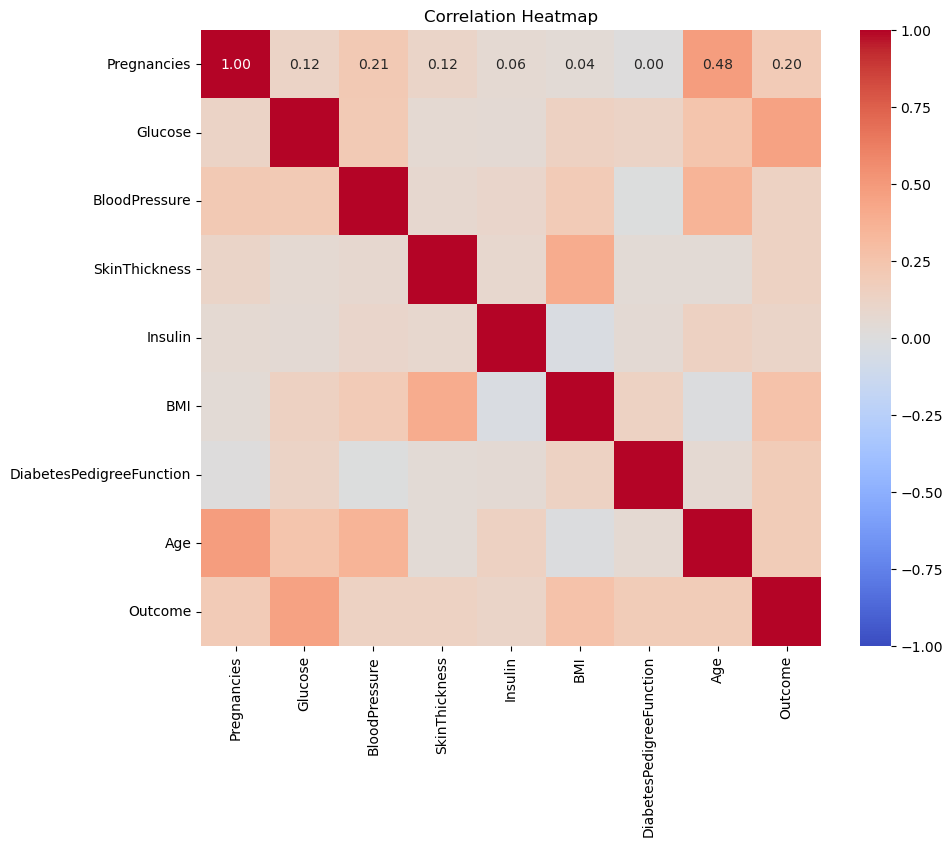

In [99]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



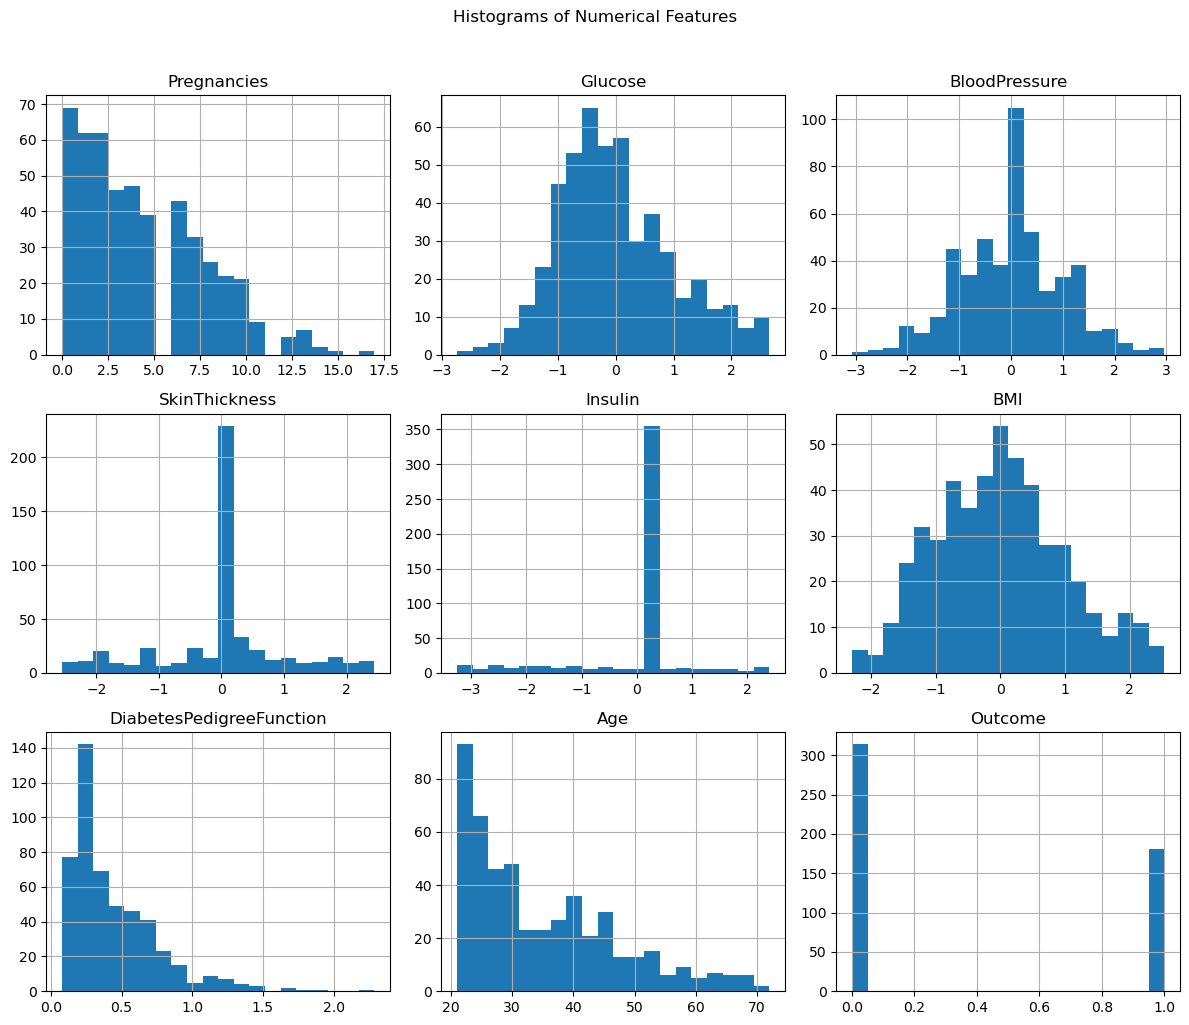

In [101]:
# Histograms of numerical features
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()


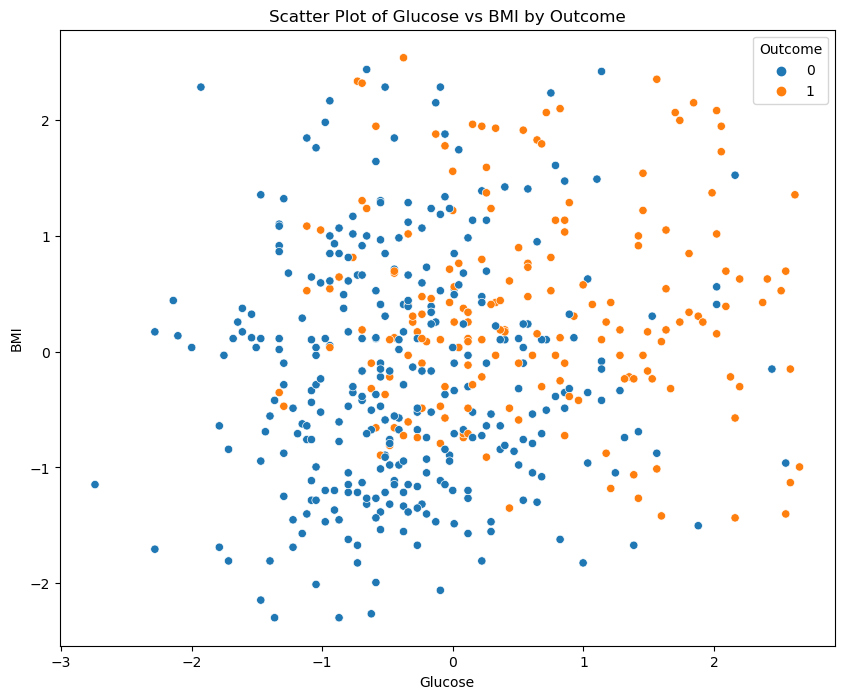

In [103]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df)
plt.title('Scatter Plot of Glucose vs BMI by Outcome')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

In [105]:
# Summary Statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count   495.000000  4.950000e+02   4.950000e+02   4.950000e+02  4.950000e+02   
mean      4.286869 -1.901958e-16   8.289665e-16  -5.454672e-16 -8.612639e-16   
std       3.474390  1.001012e+00   1.001012e+00   1.001012e+00  1.001012e+00   
min       0.000000 -2.738749e+00  -3.069385e+00  -2.549497e+00 -3.255414e+00   
25%       1.000000 -6.941278e-01  -6.201610e-01  -1.455443e-01  3.037388e-01   
50%       4.000000 -1.300943e-01  -1.678681e-02   6.774546e-02  3.037388e-01   
75%       7.000000  5.925737e-01   6.986518e-01   2.242947e-01  3.037388e-01   
max      17.000000  2.654821e+00   2.959474e+00   2.443328e+00  2.401305e+00   

                BMI  DiabetesPedigreeFunction         Age     Outcome  
count  4.950000e+02                495.000000  495.000000  495.000000  
mean  -7.930805e-16                  0.447190   34.838384    0.365657  
std    1.001012e+00                  0.318

In [107]:
# Correlation Coefficients
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)



Correlation Matrix:
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.124257       0.213562       0.116079   
Glucose                      0.124257  1.000000       0.204943       0.058106   
BloodPressure                0.213562  0.204943       1.000000       0.076551   
SkinThickness                0.116079  0.058106       0.076551       1.000000   
Insulin                      0.055508  0.052343       0.098874       0.081295   
BMI                          0.044378  0.141778       0.197933       0.405430   
DiabetesPedigreeFunction     0.003845  0.122559      -0.006590       0.041288   
Age                          0.477851  0.248565       0.351645       0.045648   
Outcome                      0.201917  0.455058       0.136515       0.137388   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.055508  0.044378                  0.003845   
Glucose            

In [109]:
skewness = df.skew()
print("Skewness of Numerical Features:\n", skewness)

Skewness of Numerical Features:
 Pregnancies                 0.713656
Glucose                     0.496929
BloodPressure               0.051584
SkinThickness              -0.242331
Insulin                    -1.460478
BMI                         0.255777
DiabetesPedigreeFunction    1.788130
Age                         0.910932
Outcome                     0.559586
dtype: float64


In [74]:
#section 4


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [123]:
# Splitting the data into training and test sets
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (396, 8), Test set: (99, 8)


In [147]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

In [151]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [153]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


In [154]:
# Train the final model using the best parameters
model = RandomForestClassifier(**grid_search.best_params_)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50)

In [141]:
# Perform stratified k-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")


Cross-Validation Accuracy Scores: [0.725      0.72151899 0.72151899 0.75949367 0.72151899]
Mean Cross-Validation Accuracy: 0.7298101265822784


In [173]:
# Evaluate on the test set
y_test_pred = model.predict(X_test)
print("Test Set Performance")
print(classification_report(y_test, y_test_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")


Test Set Performance
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        61
           1       0.72      0.61      0.66        38

    accuracy                           0.76        99
   macro avg       0.75      0.73      0.73        99
weighted avg       0.75      0.76      0.75        99

Test Accuracy: 0.7575757575757576


In [175]:
#section 5

In [177]:
from sklearn.metrics import confusion_matrix, classification_report

In [179]:
# Validation Set
y_val_pred = model.predict(X_train)
print("Confusion Matrix for Validation Set:")
print(confusion_matrix(y_train, y_val_pred))

Confusion Matrix for Validation Set:
[[249   4]
 [ 15 128]]


In [181]:
# Test Set
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_test_pred))



Confusion Matrix for Test Set:
[[52  9]
 [15 23]]


In [183]:
# Validation Set
print("\nClassification Report for Validation Set:")
print(classification_report(y_train, y_val_pred))


Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       253
           1       0.97      0.90      0.93       143

    accuracy                           0.95       396
   macro avg       0.96      0.94      0.95       396
weighted avg       0.95      0.95      0.95       396



In [185]:
# Test Set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))



Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        61
           1       0.72      0.61      0.66        38

    accuracy                           0.76        99
   macro avg       0.75      0.73      0.73        99
weighted avg       0.75      0.76      0.75        99



In [189]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [191]:
# Validation Set
val_accuracy = accuracy_score(y_train, y_val_pred)
val_precision = precision_score(y_train, y_val_pred)
val_recall = recall_score(y_train, y_val_pred)
val_f1 = f1_score(y_train, y_val_pred)

print(f"\nValidation Set Metrics:")
print(f"Accuracy: {val_accuracy:.2f}")
print(f"Precision: {val_precision:.2f}")
print(f"Recall: {val_recall:.2f}")
print(f"F1-score: {val_f1:.2f}")



Validation Set Metrics:
Accuracy: 0.95
Precision: 0.97
Recall: 0.90
F1-score: 0.93


In [193]:
# Test Set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1-score: {test_f1:.2f}")



Test Set Metrics:
Accuracy: 0.76
Precision: 0.72
Recall: 0.61
F1-score: 0.66


In [195]:
# Get feature importances
feature_importances = model.feature_importances_

# Sort indices by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importance
print("Feature Importance:")
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")


Feature Importance:
Glucose: 0.2691280629696334
BMI: 0.17442815173010637
Age: 0.1404293401613084
DiabetesPedigreeFunction: 0.1375498436770229
BloodPressure: 0.08963746410124236
Pregnancies: 0.08670314443121115
SkinThickness: 0.05817664969500987
Insulin: 0.043947343234465766


In [197]:
import shap

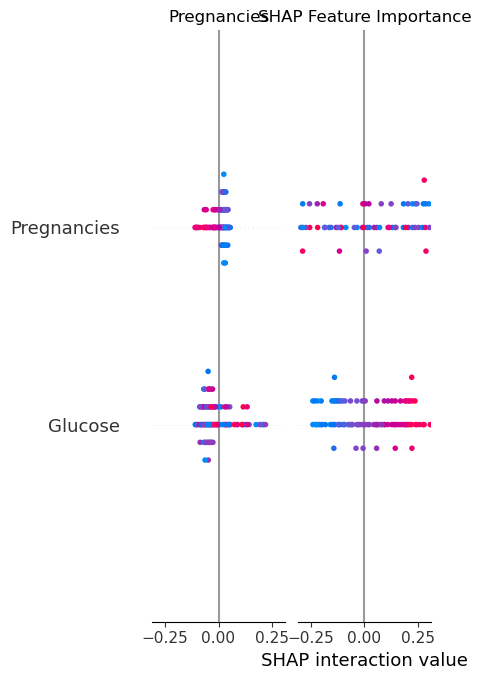

In [199]:
# Create a SHAP explainer object
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title('SHAP Feature Importance')
plt.show()


In [203]:
pip install lime


     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ---------- ---------------------------- 71.7/275.7 kB 1.3 MB/s eta 0:00:01
     ------------------------------- ------ 225.3/275.7 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=bded5ef620a6251dbb4c9e0c0e983ca9cba70bc17217fbdd60e1bcdd46c34702
  Stored in directory: c:\users\dallu\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


In [205]:
import lime
import lime.lime_tabular

In [207]:
# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode="classification", feature_names=X.columns)

# Choose an instance to explain (e.g., the first instance in the test set)
instance_idx = 0
instance = X_test.iloc[instance_idx].values
true_label = y_test.iloc[instance_idx]

# Explain the model's prediction for the chosen instance
explanation = explainer.explain_instance(instance, model.predict_proba, num_features=len(X.columns))

# Display the explanation
explanation.show_in_notebook(show_table=True, show_all=False)


C:\Users\dallu\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
